Notebook to combine and bin data for the NHL from 2014-2019

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
data1 = "nhl odds 2014-15.csv"
data2 = "nhl odds 2015-16.csv"
data3 = "nhl odds 2016-17.csv"
data4 = "nhl odds 2017-18.csv"
data5 = "nhl odds 2018-19.csv"

# Read the mouse data and the study results
data1 = pd.read_csv(data1)
data2 = pd.read_csv(data2)
data3 = pd.read_csv(data3)
data4 = pd.read_csv(data4)
data5 = pd.read_csv(data5)

In [33]:
#put the frames of the different seasons into a list
frames = [data1, data2, data3, data4, data5]

#stack the frames into a single set for analysis
df = pd.concat(frames)
df.head()

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck Line,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15
0,1008,1,V,Montreal,1,1,2,4,-105,-105,1.5,-305.0,5.5,106,5.5,110
1,1008,2,H,Toronto,2,0,1,3,-115,-115,-1.5,250.0,5.5,-126,5.5,-130
2,1008,3,V,Philadelphia,0,0,1,1,165,165,1.5,-180.0,5.5,123,5.5,115
3,1008,4,H,Boston,1,0,1,2,-195,-185,-1.5,155.0,5.5,-143,5.5,-135
4,1008,5,V,SanJose,1,3,0,4,101,130,1.5,-240.0,5.5,127,5.0,-136


In [34]:
p_dif = []

for i in range(1, df.shape[0], 2):
        home_dif = df['Final'].iloc[i] - df['Final'].iloc[i-1]
        away_dif = df['Final'].iloc[i-1] - df['Final'].iloc[i]
        p_dif.append(away_dif)
        p_dif.append(home_dif)
        
df['Point_Dif'] = p_dif
df.head()

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck Line,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point_Dif
0,1008,1,V,Montreal,1,1,2,4,-105,-105,1.5,-305.0,5.5,106,5.5,110,1
1,1008,2,H,Toronto,2,0,1,3,-115,-115,-1.5,250.0,5.5,-126,5.5,-130,-1
2,1008,3,V,Philadelphia,0,0,1,1,165,165,1.5,-180.0,5.5,123,5.5,115,-1
3,1008,4,H,Boston,1,0,1,2,-195,-185,-1.5,155.0,5.5,-143,5.5,-135,1
4,1008,5,V,SanJose,1,3,0,4,101,130,1.5,-240.0,5.5,127,5.0,-136,4


In [35]:
ml_pays_result = []

for i in range(0, df.shape[0]):
    if df['Close'].iloc[i] < 0:
        result = -100/df['Close'].iloc[i]
        ml_pays_result.append(result)
    else:
        result = df['Close'].iloc[i]/100
        ml_pays_result.append(result)
        
df['ML_Pays'] = ml_pays_result
df.head()

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck Line,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point_Dif,ML_Pays
0,1008,1,V,Montreal,1,1,2,4,-105,-105,1.5,-305.0,5.5,106,5.5,110,1,0.952381
1,1008,2,H,Toronto,2,0,1,3,-115,-115,-1.5,250.0,5.5,-126,5.5,-130,-1,0.869565
2,1008,3,V,Philadelphia,0,0,1,1,165,165,1.5,-180.0,5.5,123,5.5,115,-1,1.650000
3,1008,4,H,Boston,1,0,1,2,-195,-185,-1.5,155.0,5.5,-143,5.5,-135,1,0.540541
4,1008,5,V,SanJose,1,3,0,4,101,130,1.5,-240.0,5.5,127,5.0,-136,4,1.300000


In [36]:
pl_pays_result = []

for i in range(0, df.shape[0]):
    if df['Unnamed: 11'].iloc[i] < 0:
        result = -100/df['Unnamed: 11'].iloc[i]
        pl_pays_result.append(result)
    else:
        result = df['Unnamed: 11'].iloc[i]/100
        pl_pays_result.append(result)
        
df['PL_Pays'] = pl_pays_result
df.head()

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck Line,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point_Dif,ML_Pays,PL_Pays
0,1008,1,V,Montreal,1,1,2,4,-105,-105,1.5,-305.0,5.5,106,5.5,110,1,0.952381,0.327869
1,1008,2,H,Toronto,2,0,1,3,-115,-115,-1.5,250.0,5.5,-126,5.5,-130,-1,0.869565,2.500000
2,1008,3,V,Philadelphia,0,0,1,1,165,165,1.5,-180.0,5.5,123,5.5,115,-1,1.650000,0.555556
3,1008,4,H,Boston,1,0,1,2,-195,-185,-1.5,155.0,5.5,-143,5.5,-135,1,0.540541,1.550000
4,1008,5,V,SanJose,1,3,0,4,101,130,1.5,-240.0,5.5,127,5.0,-136,4,1.300000,0.416667


In [37]:
ml_outcome = []

for i in range(0, df.shape[0]):
    if df['Point_Dif'].iloc[i] > 0:
        result = 100*df['ML_Pays'].iloc[i]
        ml_outcome.append(result)
    else:
        result = -100
        ml_outcome.append(result)
        
df['ML_Outcome'] = ml_outcome
df.head()

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,Puck Line,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point_Dif,ML_Pays,PL_Pays,ML_Outcome
0,1008,1,V,Montreal,1,1,2,4,-105,-105,1.5,-305.0,5.5,106,5.5,110,1,0.952381,0.327869,95.238095
1,1008,2,H,Toronto,2,0,1,3,-115,-115,-1.5,250.0,5.5,-126,5.5,-130,-1,0.869565,2.500000,-100.000000
2,1008,3,V,Philadelphia,0,0,1,1,165,165,1.5,-180.0,5.5,123,5.5,115,-1,1.650000,0.555556,-100.000000
3,1008,4,H,Boston,1,0,1,2,-195,-185,-1.5,155.0,5.5,-143,5.5,-135,1,0.540541,1.550000,54.054054
4,1008,5,V,SanJose,1,3,0,4,101,130,1.5,-240.0,5.5,127,5.0,-136,4,1.300000,0.416667,130.000000


In [38]:
pl_outcome = []

for i in range(0, df.shape[0]):
    if df['Point_Dif'].iloc[i] >= 2:
        result = 100*df['PL_Pays'].iloc[i]
        pl_outcome.append(result)
    elif (df['Point_Dif'].iloc[i] <= 1) & (df['Puck Line'].iloc[i] == -1.5):
        result = -100
        pl_outcome.append(result)
    elif (df['Point_Dif'].iloc[i] >= -1) & (df['Puck Line'].iloc[i] == 1.5):
        result = 100*df['PL_Pays'].iloc[i]
        pl_outcome.append(result)
    else:
        result = -100
        pl_outcome.append(result)
        
df['PL_Outcome'] = pl_outcome
df.head()

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,...,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point_Dif,ML_Pays,PL_Pays,ML_Outcome,PL_Outcome
0,1008,1,V,Montreal,1,1,2,4,-105,-105,...,-305.0,5.5,106,5.5,110,1,0.952381,0.327869,95.238095,32.786885
1,1008,2,H,Toronto,2,0,1,3,-115,-115,...,250.0,5.5,-126,5.5,-130,-1,0.869565,2.500000,-100.000000,-100.000000
2,1008,3,V,Philadelphia,0,0,1,1,165,165,...,-180.0,5.5,123,5.5,115,-1,1.650000,0.555556,-100.000000,55.555556
3,1008,4,H,Boston,1,0,1,2,-195,-185,...,155.0,5.5,-143,5.5,-135,1,0.540541,1.550000,54.054054,-100.000000
4,1008,5,V,SanJose,1,3,0,4,101,130,...,-240.0,5.5,127,5.0,-136,4,1.300000,0.416667,130.000000,41.666667


In [39]:
away_df = df[df['VH']=='V'].reset_index()
home_df = df[df['VH']=='H'].reset_index()

In [40]:
away_df.head()

,index,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,...,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point_Dif,ML_Pays,PL_Pays,ML_Outcome,PL_Outcome
0,0,1008,1,V,Montreal,1,1,2,4,-105,...,-305.0,5.5,106,5.5,110,1,0.952381,0.327869,95.238095,32.786885
1,2,1008,3,V,Philadelphia,0,0,1,1,165,...,-180.0,5.5,123,5.5,115,-1,1.650000,0.555556,-100.000000,55.555556
2,4,1008,5,V,SanJose,1,3,0,4,101,...,-240.0,5.5,127,5.0,-136,4,1.300000,0.416667,130.000000,41.666667
3,6,1008,7,V,Vancouver,1,2,1,4,-131,...,230.0,5.5,123,5.0,-140,2,0.793651,2.300000,79.365079,230.000000
4,8,1009,51,V,Montreal,0,0,1,2,115,...,-245.0,5.5,-105,5.5,115,1,1.250000,0.408163,125.000000,40.816327


In [41]:
home_df.head()

,index,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,...,Unnamed: 11,Open OU,Unnamed: 13,Close OU,Unnamed: 15,Point_Dif,ML_Pays,PL_Pays,ML_Outcome,PL_Outcome
0,1,1008,2,H,Toronto,2,0,1,3,-115,...,250.0,5.5,-126,5.5,-130,-1,0.869565,2.500000,-100.000000,-100.0
1,3,1008,4,H,Boston,1,0,1,2,-195,...,155.0,5.5,-143,5.5,-135,1,0.540541,1.550000,54.054054,-100.0
2,5,1008,6,H,LosAngeles,0,0,0,0,-121,...,200.0,5.5,-147,5.0,116,-4,0.666667,2.000000,-100.000000,-100.0
3,7,1008,8,H,Calgary,0,2,0,2,111,...,-275.0,5.5,-143,5.0,120,-2,1.060000,0.363636,-100.000000,-100.0
4,9,1009,52,H,Washington,1,0,0,1,-135,...,205.0,5.5,-115,5.5,-135,-1,0.689655,2.050000,-100.000000,-100.0


In [42]:
home_df['ML_Outcome'].sum()

-29624.858063309508

In [44]:
home_df['PL_Outcome'].sum()

-25367.159463265205

In [43]:
away_df['ML_Outcome'].sum()

-16908.364093531975

In [45]:
away_df['PL_Outcome'].sum()

-27575.681092115858

In [46]:
fav_df = df[df['Puck Line']== -1.5].reset_index()
ud_df = df[df['Puck Line']== 1.5].reset_index()

In [47]:
fav_df['ML_Outcome'].sum()

-18217.1987315893

In [48]:
ud_df['ML_Outcome'].sum()

-28139.69225642102

In [49]:
fav_df['PL_Outcome'].sum()

-30249.87611154274

In [50]:
ud_df['PL_Outcome'].sum()

-22092.964443838315

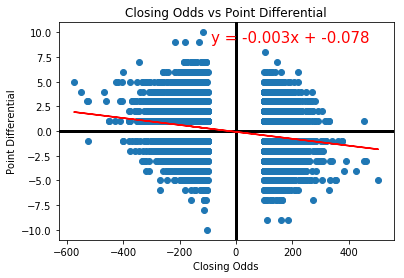

In [24]:
x_values = df['Close']
y_values = df['Point_Dif']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-90, 9),fontsize=15,color="red")
plt.axhspan(-0.1, 0.1, -700, 700, color="black")
plt.axhspan(-12, 12, 0.528, 0.532, color="black")
plt.title('Closing Odds vs Point Differential')
plt.ylim(-11, 11)
plt.xlabel("Closing Odds")
plt.ylabel("Point Differential")
plt.show()

At -526, a team is expected to win by 1.5 goals, so puckline on the favorite is a better bet
At +474, a team is expected to lose by 1.5 goals, so moneyline on the favorite is a better bet